In [1]:
pip install textblob

In [2]:
from textblob import TextBlob

In [3]:
# pip install transformers

  Using cached transformers-4.18.0-py3-none-any.whl (4.0 MB)
  Using cached filelock-3.4.1-py3-none-any.whl (9.9 kB)
  Using cached PyYAML-6.0.1-cp36-cp36m-win_amd64.whl (153 kB)


  ERROR: Command errored out with exit status 1:
   command: 'c:\users\sudipa\appdata\local\programs\python\python36\python.exe' 'c:\users\sudipa\appdata\local\programs\python\python36\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\Sudipa\AppData\Local\Temp\tmp6xuygeca'
       cwd: C:\Users\Sudipa\AppData\Local\Temp\pip-install-pz4i1cej\tokenizers_107a8e687dba463684f63970bdd79875
  Complete output (51 lines):
  running bdist_wheel
  running build



  Using cached sacremoses-0.0.53.tar.gz (880 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached huggingface_hub-0.4.0-py3-none-any.whl (67 kB)
  Using cached tokenizers-0.12.1.tar.gz (220 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using legacy 'setup.py install' for sacremoses, since package 'wheel' is not installed.
Failed to build tokenizers


  running build_py
  creating build
  creating build\lib.win-amd64-3.6
  creating build\lib.win-amd64-3.6\tokenizers
  copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-3.6\tokenizers
  creating build\lib.win-amd64-3.6\tokenizers\models
  copying py_src\tokenizers\models\__init__.py -> build\lib.win-amd64-3.6\tokenizers\models
  creating build\lib.win-amd64-3.6\tokenizers\decoders
  copying py_src\tokenizers\decoders\__init__.py -> build\lib.win-amd64-3.6\tokenizers\decoders
  creating build\lib.win-amd64-3.6\tokenizers\normalizers
  copying py_src\tokenizers\normalizers\__init__.py -> build\lib.win-amd64-3.6\tokenizers\normalizers
  creating build\lib.win-amd64-3.6\tokenizers\pre_tokenizers
  copying py_src\tokenizers\pre_tokenizers\__init__.py -> build\lib.win-amd64-3.6\tokenizers\pre_tokenizers
  creating build\lib.win-amd64-3.6\tokenizers\processors
  copying py_src\tokenizers\processors\__init__.py -> build\lib.win-amd64-3.6\tokenizers\processors
  creating build\lib.wi

In [4]:
# import transformers

ModuleNotFoundError: No module named 'transformers'

In [5]:
import pandas as pd
df = pd.read_csv('Cleaned_realme C53 (Champion Gold, 128 GB)  (6 GB RAM).csv')
df.head()

,Customer Name,Review Title,Rating,Comment,Cleaned_text
0,RANGU HARI PRASAD,Great product,4,Camara quality superb.....Quick chargingDispla...,"['camara', 'quality', 'superb', 'quick', 'char..."
1,Akash Ali,Mind-blowing purchase,5,Nice product and I'm happy,"['nice', 'product', 'happy']"
2,Sonu Tiwari,Perfect product!,5,Amazing camera 💗💗💗💗,"['amaze', 'camera']"
3,Vinoth kumar,Wonderful,4,Camara is good!,"['camara', 'good']"
4,Govind Sharma,Nice,3,Overall phone is good in this price range one ...,"['overall', 'phone', 'good', 'price', 'range',..."


In [6]:
len(df.index)

1765

In [7]:
import numpy as np

def create_sentiment(rating):

    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['Sentiment'] = df['Rating'].apply(create_sentiment)

In [8]:
from sklearn.feature_extraction.text import re

def clean_data(review):

    no_punc = re.sub(r'[^\w\s]', '', review)
    no_digits = ''.join([i for i in no_punc if not i.isdigit()])

    return(no_digits)

In [9]:
df['Cleaned_text'][0]

"['camara', 'quality', 'superb', 'quick', 'chargingdisplay', 'ok', 'update', 'review', 'days']"

In [10]:
df['Cleaned_text'] = df['Cleaned_text'].apply(clean_data)
df['Cleaned_text'][0]

'camara quality superb quick chargingdisplay ok update review days'

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['Cleaned_text'])

In [12]:
from sklearn.model_selection import train_test_split
y = df['Sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.8959276018099548

In [15]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
def sentiment_scores(sentence):

    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("Product was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Product was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Product was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Product is overall rated as", end = " ")

    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

In [18]:
import csv

if __name__ == "__main__":
    csv_file = 'Cleaned_realme C53 (Champion Gold, 128 GB)  (6 GB RAM).csv'
    print("Text Selected for VADER Sentimental Analysis:")

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        comments = [row['Cleaned_text'] for row in reader]


    sentence1 = ' '.join(comments)
#     print(sentence1)


Text Selected for VADER Sentimental Analysis:


In [19]:

sentiment_scores(sentence1)

Overall sentiment dictionary is :  {'neg': 0.073, 'neu': 0.377, 'pos': 0.55, 'compound': 1.0}
Product was rated as  7.3 % Negative
Product was rated as  37.7 % Neutral
Product was rated as  55.00000000000001 % Positive
Product is overall rated as Positive


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sudipa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Text Selected for VADER Sentimental Analysis:
Enter your specific criteria (comma-separated): display
Enter the number of reviews you want to display: 100

Corresponding Comments:
1. Camara quality superb.....Quick chargingDisplay (ok)..I will update the review after few days.
2. Very nice design...very good camera...but 4g phone and not FHD display..for the price its very good...
3. Overall very good looking mobile battery camera display 5 🌟🌟🌟🌟🌟
4. iPhone looking good budget mobile overall good battery camera display performance anything all rounder package best price
5. Best smart phone on this price.i love Realme c 53CRating out of 5Camera 5Battery backup 5Display 4Sound quality 4Performance 5
6. I'm amazed by realme's new smartphone.The design is breathing, and the display is vibrant. Realme knows how to deliver the best.
7. I purchased last 23 Rd JulyThe camera is not 108 MP the camera is not good performance and mobile is very slowDisplay resolution is dark 🌑The total phone worki

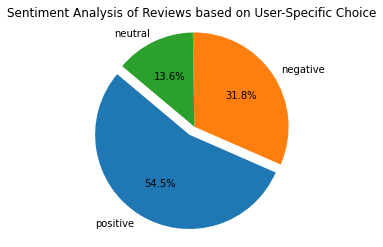


Sentiment Analysis Summary:
Positive: 54.55%
Negative: 31.82%
Neutral: 13.64%


In [21]:
import csv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

def search_comments(csv_file, criteria, num_reviews):
    relevant_comments = []
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            comment = row['Cleaned_text'].lower()
            if any(word in comment for word in criteria):
                relevant_comments.append(row['Comment'])
                if len(relevant_comments) == num_reviews:
                    break  # Stop after reaching the specified number of reviews
    return relevant_comments

def analyze_sentiment(comment):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(comment)
    return sentiment_scores

if __name__ == "__main__":
    csv_file = 'Cleaned_realme C53 (Champion Gold, 128 GB)  (6 GB RAM).csv'
    print("Text Selected for VADER Sentimental Analysis:")

    user_criteria = input("Enter your specific criteria (comma-separated): ").lower()
    criteria_list = [c.strip() for c in user_criteria.split(',')]

    num_reviews = int(input("Enter the number of reviews you want to display: "))

    relevant_comments = search_comments(csv_file, criteria_list, num_reviews)

    if not relevant_comments:
        print(f"\nNo reviews present regarding '{', '.join(criteria_list)}' in the 'Cleaned_text'.")
    else:
        print("\nCorresponding Comments:")
        for index, comment in enumerate(relevant_comments, start=1):
            print(f"{index}. {comment}")
        # Perform sentiment analysis on the relevant comments
        sentiments = {'positive': 0, 'negative': 0, 'neutral': 0}
        for comment in relevant_comments:
            sentiment_scores = analyze_sentiment(comment)
            if sentiment_scores['compound'] >= 0.05:
                sentiments['positive'] += 1
            elif sentiment_scores['compound'] <= -0.05:
                sentiments['negative'] += 1
            else:
                sentiments['neutral'] += 1
        
        # Display sentiment percentages in a pie chart
        labels = sentiments.keys()
        sizes = sentiments.values()
        explode = (0.1, 0, 0)  # explode the 1st slice (positive sentiment)

        plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
        plt.title('Sentiment Analysis of Reviews based on User-Specific Choice')
        plt.show()

        # Display sentiment percentages in text
        total_reviews = sum(sentiments.values())
        print("\nSentiment Analysis Summary:")
        for sentiment, count in sentiments.items():
            percentage = (count / total_reviews) * 100
            print(f"{sentiment.capitalize()}: {percentage:.2f}%")
